# 🎰 Lotto Max Number Predictor

This notebook analyzes historical Lotto Max data and generates predictions using multiple statistical and machine learning approaches.

**Disclaimer:** For entertainment and educational purposes only. Lottery draws are random and past results do not predict future outcomes.

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Load the Lotto Max data
df = pd.read_excel('/content/lottomax.xlsx')

print(f"Dataset loaded: {len(df)} draws")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nColumns: {df.columns.tolist()}")
print("\nFirst 5 draws:")
df.head()

Dataset loaded: 1205 draws
Date range: 2009-09-25 00:00:00 to 2026-01-30 00:00:00

Columns: ['Date', 'Number1', 'Number2', 'Number3', 'Number4', 'Number5', 'Number6', 'Number7', 'Bonus']

First 5 draws:


,Date,Number1,Number2,Number3,Number4,Number5,Number6,Number7,Bonus
0,2009-09-25,5,17,19,25,31,38,46,4
1,2009-10-02,8,27,28,29,31,32,35,11
2,2009-10-09,5,15,25,38,42,46,47,26
3,2009-10-16,4,10,18,20,31,35,44,29
4,2009-10-23,4,7,10,12,23,25,36,18


## 2. Data Preparation and Analysis

In [3]:
# Prepare the data
def prepare_data(df):
    """Extract and organize lottery numbers."""
    main_numbers = []
    for idx, row in df.iterrows():
        numbers = [row[f'Number{i}'] for i in range(1, 8)]
        main_numbers.append(sorted(numbers))

    # Flatten all numbers for frequency analysis
    all_numbers_flat = []
    for numbers in main_numbers:
        all_numbers_flat.extend(numbers)

    return main_numbers, all_numbers_flat, df['Bonus'].tolist()

main_numbers, all_numbers_flat, bonus_numbers = prepare_data(df)

print(f"Total main numbers analyzed: {len(all_numbers_flat):,}")
print(f"Total bonus numbers: {len(bonus_numbers)}")
print(f"\nExample draw: {main_numbers[-1]}")

Total main numbers analyzed: 8,435
Total bonus numbers: 1205

Example draw: [30, 34, 38, 43, 44, 46, 49]


## 3. Frequency Analysis

In [4]:
# Calculate frequencies
number_freq = Counter(all_numbers_flat)
freq_df = pd.DataFrame([
    {'Number': num, 'Frequency': count, 'Percentage': count/len(main_numbers)*100}
    for num, count in sorted(number_freq.items())
])

freq_df = freq_df.sort_values('Frequency', ascending=False).reset_index(drop=True)

print("Top 10 Most Frequent Numbers:")
print(freq_df.head(10).to_string(index=False))
print("\nBottom 10 Least Frequent Numbers:")
print(freq_df.tail(10).to_string(index=False))

Top 10 Most Frequent Numbers:
 Number  Frequency  Percentage
     19        197   16.348548
     28        195   16.182573
      7        193   16.016598
     39        191   15.850622
      2        188   15.601660
     30        186   15.435685
     36        185   15.352697
     22        184   15.269710
     24        183   15.186722
     38        182   15.103734

Bottom 10 Least Frequent Numbers:
 Number  Frequency  Percentage
     48        158   13.112033
      4        157   13.029046
     21        157   13.029046
     13        155   12.863071
     42        155   12.863071
     27        153   12.697095
     23        152   12.614108
     33        150   12.448133
     49        143   11.867220
     50         98    8.132780


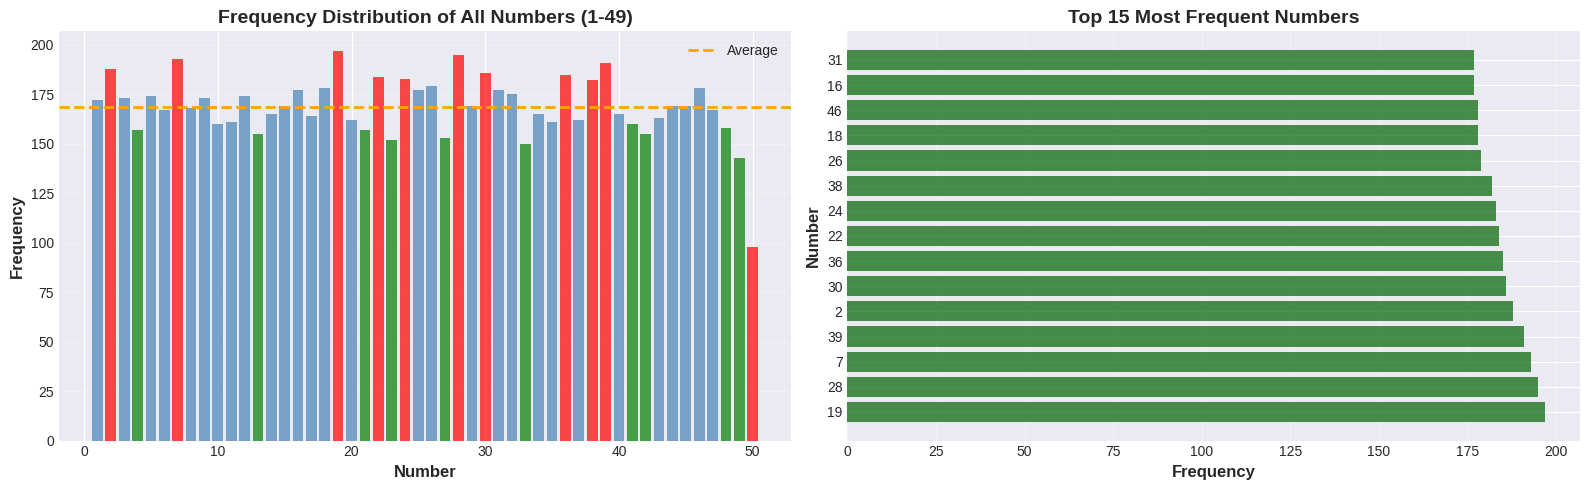

✓ Frequency analysis complete


In [5]:
# Visualize frequency distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Bar chart of all numbers
colors = ['red' if i < 10 else 'green' if i >= 39 else 'steelblue' for i in range(49)]
ax1.bar(freq_df['Number'], freq_df['Frequency'], color=colors, alpha=0.7)
ax1.axhline(y=freq_df['Frequency'].mean(), color='orange', linestyle='--', linewidth=2, label='Average')
ax1.set_xlabel('Number', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Frequency Distribution of All Numbers (1-49)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Top 15 numbers
top_15 = freq_df.head(15)
ax2.barh(top_15['Number'].astype(str), top_15['Frequency'], color='darkgreen', alpha=0.7)
ax2.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number', fontsize=12, fontweight='bold')
ax2.set_title('Top 15 Most Frequent Numbers', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('/content/frequency_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Frequency analysis complete")

## 4. Hot and Cold Numbers Analysis

In [6]:
def analyze_hot_cold(main_numbers, recent_draws=50):
    """Identify hot and cold numbers."""
    recent_numbers = []
    for numbers in main_numbers[-recent_draws:]:
        recent_numbers.extend(numbers)

    counter = Counter(recent_numbers)
    all_numbers = set(range(1, 50))
    cold_numbers = all_numbers - set(counter.keys())

    hot = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True)[:15])
    cold = list(cold_numbers)

    return hot, cold, counter

hot_numbers, cold_numbers, recent_counter = analyze_hot_cold(main_numbers, recent_draws=50)

print("🔥 HOT Numbers (Last 50 Draws):")
for num, count in list(hot_numbers.items())[:10]:
    print(f"   Number {num:2d}: appeared {count:2d} times")

print(f"\n❄️  COLD Numbers (Last 50 Draws): {sorted(cold_numbers) if cold_numbers else 'None - all numbers appeared'}")

🔥 HOT Numbers (Last 50 Draws):
   Number  9: appeared 13 times
   Number 43: appeared 13 times
   Number 45: appeared 12 times
   Number 30: appeared 12 times
   Number  3: appeared 12 times
   Number 16: appeared 11 times
   Number 21: appeared 11 times
   Number 28: appeared 10 times
   Number 22: appeared 10 times
   Number 33: appeared  9 times

❄️  COLD Numbers (Last 50 Draws): None - all numbers appeared


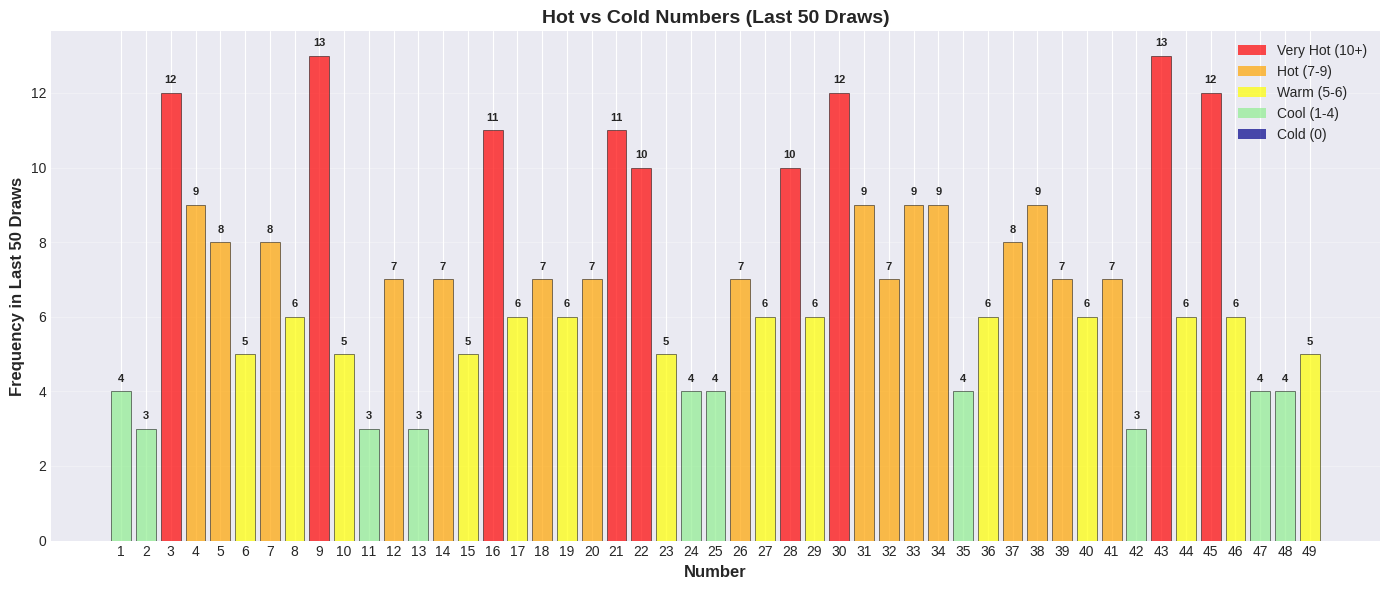

✓ Hot/Cold analysis complete


In [7]:
# Visualize hot and cold numbers
fig, ax = plt.subplots(figsize=(14, 6))

# Create a heatmap-style visualization
numbers = list(range(1, 50))
frequencies = [recent_counter.get(num, 0) for num in numbers]

colors_map = ['darkblue' if f == 0 else 'red' if f > 9 else 'orange' if f > 6 else 'yellow' if f > 4 else 'lightgreen' for f in frequencies]

bars = ax.bar(numbers, frequencies, color=colors_map, alpha=0.7, edgecolor='black', linewidth=0.5)

# Add value labels on bars
for i, (num, freq) in enumerate(zip(numbers, frequencies)):
    if freq > 0:
        ax.text(num, freq + 0.2, str(freq), ha='center', va='bottom', fontsize=8, fontweight='bold')

ax.set_xlabel('Number', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency in Last 50 Draws', fontsize=12, fontweight='bold')
ax.set_title('Hot vs Cold Numbers (Last 50 Draws)', fontsize=14, fontweight='bold')
ax.set_xticks(numbers)
ax.grid(axis='y', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.7, label='Very Hot (10+)'),
    Patch(facecolor='orange', alpha=0.7, label='Hot (7-9)'),
    Patch(facecolor='yellow', alpha=0.7, label='Warm (5-6)'),
    Patch(facecolor='lightgreen', alpha=0.7, label='Cool (1-4)'),
    Patch(facecolor='darkblue', alpha=0.7, label='Cold (0)')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('/content/hot_cold_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Hot/Cold analysis complete")

## 5. Trend Analysis Over Time

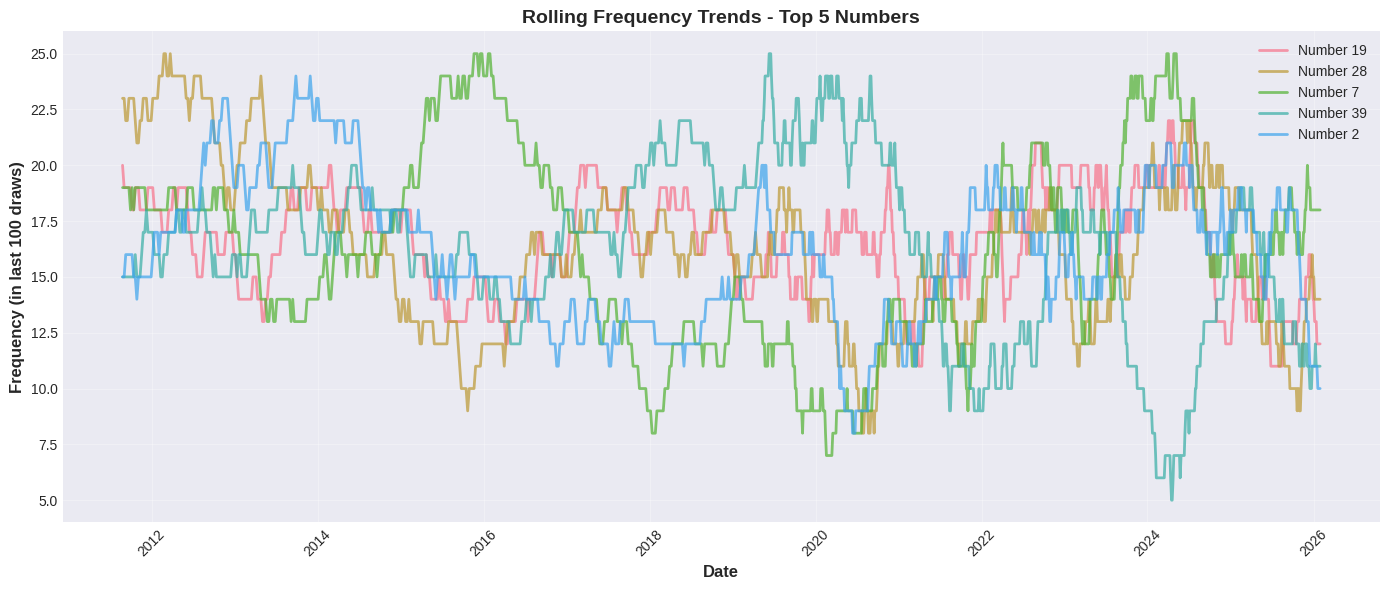

✓ Trend analysis complete


In [8]:
# Analyze trends for top numbers over time
def calculate_rolling_frequency(df, main_numbers, number, window=100):
    """Calculate rolling frequency for a specific number."""
    frequencies = []
    for i in range(window, len(main_numbers)):
        recent = main_numbers[i-window:i]
        flat = [n for draw in recent for n in draw]
        freq = flat.count(number)
        frequencies.append(freq)
    return frequencies

# Select top 5 numbers to track
top_5_numbers = freq_df.head(5)['Number'].tolist()

fig, ax = plt.subplots(figsize=(14, 6))

window = 100
for num in top_5_numbers:
    rolling_freq = calculate_rolling_frequency(df, main_numbers, num, window)
    dates = df['Date'].iloc[window:].values
    ax.plot(dates, rolling_freq, label=f'Number {num}', linewidth=2, alpha=0.7)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel(f'Frequency (in last {window} draws)', fontsize=12, fontweight='bold')
ax.set_title(f'Rolling Frequency Trends - Top 5 Numbers', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/trend_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Trend analysis complete")

## 6. Number Pair Analysis

In [9]:
# Find most common number pairs
pair_counts = Counter()

for numbers in main_numbers:
    for i in range(len(numbers)):
        for j in range(i+1, len(numbers)):
            pair = tuple(sorted([numbers[i], numbers[j]]))
            pair_counts[pair] += 1

top_pairs = pair_counts.most_common(20)

print("Top 20 Most Common Number Pairs:")
print("="*50)
for i, ((num1, num2), count) in enumerate(top_pairs, 1):
    percentage = (count / len(main_numbers)) * 100
    print(f"{i:2d}. ({num1:2d}, {num2:2d}): appeared together {count:3d} times ({percentage:.1f}%)")

Top 20 Most Common Number Pairs:
 1. ( 7, 18): appeared together  40 times (3.3%)
 2. (31, 39): appeared together  37 times (3.1%)
 3. (18, 19): appeared together  36 times (3.0%)
 4. (28, 41): appeared together  35 times (2.9%)
 5. (22, 46): appeared together  35 times (2.9%)
 6. ( 1, 39): appeared together  35 times (2.9%)
 7. (28, 36): appeared together  34 times (2.8%)
 8. (24, 26): appeared together  34 times (2.8%)
 9. ( 3, 19): appeared together  34 times (2.8%)
10. ( 8, 28): appeared together  33 times (2.7%)
11. (24, 43): appeared together  33 times (2.7%)
12. ( 9, 30): appeared together  33 times (2.7%)
13. ( 5, 46): appeared together  32 times (2.7%)
14. (12, 28): appeared together  32 times (2.7%)
15. ( 7, 30): appeared together  32 times (2.7%)
16. ( 9, 19): appeared together  31 times (2.6%)
17. (38, 43): appeared together  31 times (2.6%)
18. ( 8, 24): appeared together  31 times (2.6%)
19. ( 9, 24): appeared together  31 times (2.6%)
20. (22, 32): appeared together  31 

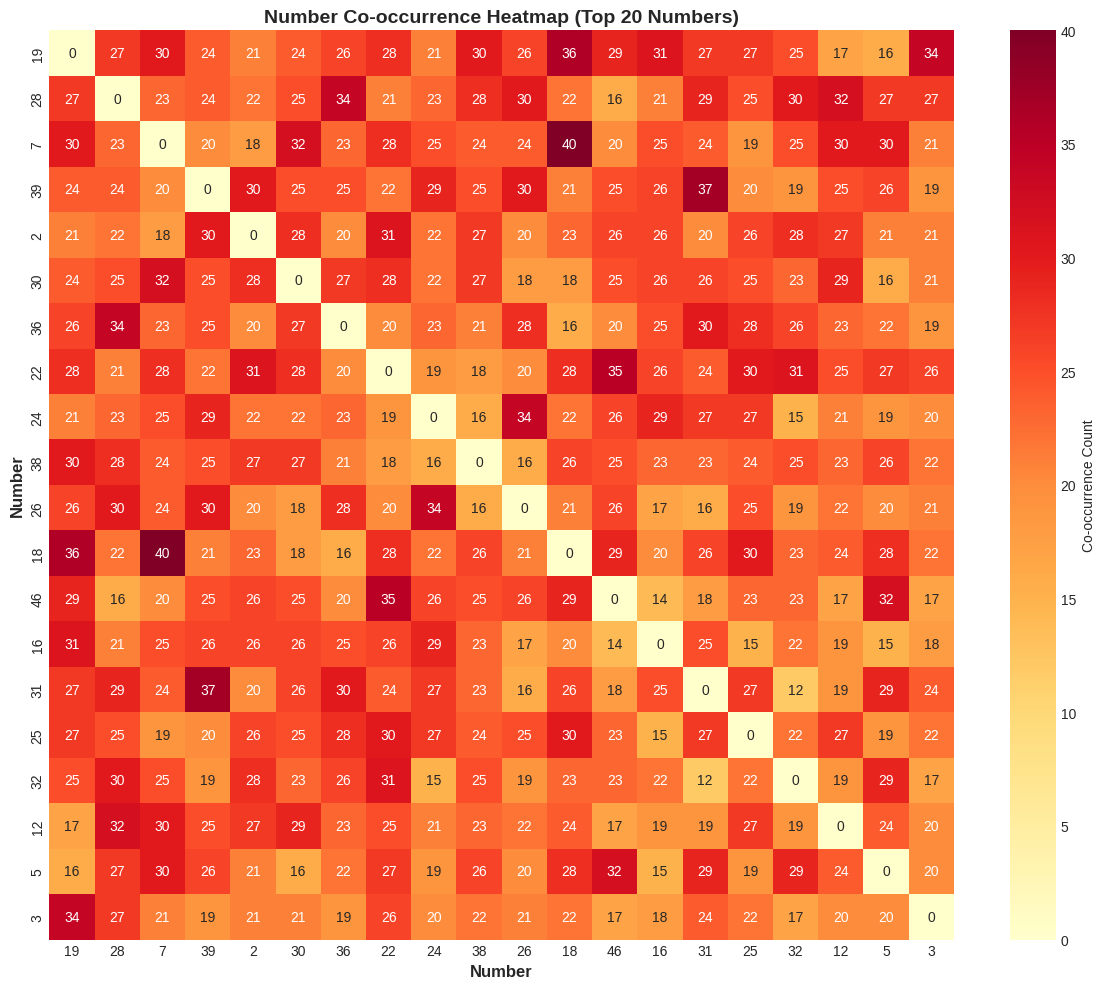

✓ Pair analysis complete


In [10]:
# Create a co-occurrence heatmap for top 20 numbers
top_20_nums = freq_df.head(20)['Number'].tolist()
cooccurrence_matrix = np.zeros((20, 20))

for numbers in main_numbers:
    for i, num1 in enumerate(top_20_nums):
        for j, num2 in enumerate(top_20_nums):
            if i != j and num1 in numbers and num2 in numbers:
                cooccurrence_matrix[i][j] += 1

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cooccurrence_matrix,
            xticklabels=top_20_nums,
            yticklabels=top_20_nums,
            annot=True,
            fmt='.0f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Co-occurrence Count'},
            ax=ax)
ax.set_title('Number Co-occurrence Heatmap (Top 20 Numbers)', fontsize=14, fontweight='bold')
ax.set_xlabel('Number', fontsize=12, fontweight='bold')
ax.set_ylabel('Number', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/cooccurrence_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Pair analysis complete")

## 7. Prediction Methods

### 7.1 Frequency-Based Prediction

In [11]:
def predict_by_frequency(freq_df, n=7):
    """Predict based on most frequent numbers."""
    return sorted(freq_df.head(n)['Number'].tolist())

freq_prediction = predict_by_frequency(freq_df)
print(f"Frequency-Based Prediction: {freq_prediction}")

Frequency-Based Prediction: [2, 7, 19, 28, 30, 36, 39]


### 7.2 Hot Numbers Prediction

In [12]:
def predict_by_hot_numbers(hot_numbers, freq_df, n=7):
    """Predict using hot numbers from recent draws."""
    hot_list = list(hot_numbers.keys())[:n]

    # Fill with frequency if needed
    if len(hot_list) < n:
        for num in freq_df['Number']:
            if num not in hot_list:
                hot_list.append(num)
            if len(hot_list) >= n:
                break

    return sorted(hot_list[:n])

hot_prediction = predict_by_hot_numbers(hot_numbers, freq_df)
print(f"Hot Numbers Prediction: {hot_prediction}")

Hot Numbers Prediction: [3, 9, 16, 21, 30, 43, 45]


### 7.3 Cold Numbers Prediction

In [13]:
def predict_by_cold_numbers(cold_numbers, freq_df, n=7):
    """Predict using cold numbers (due for appearance)."""
    # Get frequency of cold numbers
    freq_dict = dict(zip(freq_df['Number'], freq_df['Frequency']))
    cold_with_freq = [(num, freq_dict.get(num, 0)) for num in cold_numbers]
    cold_sorted = sorted(cold_with_freq, key=lambda x: x[1], reverse=True)

    cold_list = [num for num, _ in cold_sorted[:n]]

    # Fill with least frequent if needed
    if len(cold_list) < n:
        for num in freq_df.sort_values('Frequency')['Number']:
            if num not in cold_list:
                cold_list.append(num)
            if len(cold_list) >= n:
                break

    return sorted(cold_list[:n])

cold_prediction = predict_by_cold_numbers(cold_numbers, freq_df)
print(f"Cold Numbers Prediction: {cold_prediction}")

Cold Numbers Prediction: [13, 23, 27, 33, 42, 49, 50]


### 7.4 Balanced Prediction

In [14]:
def predict_balanced(hot_numbers, freq_df, n=7):
    """Predict using balanced approach (hot + frequency)."""
    freq_dict = dict(zip(freq_df['Number'], freq_df['Frequency']))

    scores = {}
    for num in range(1, 50):
        hot_score = hot_numbers.get(num, 0) * 2  # Weight recent activity
        freq_score = freq_dict.get(num, 0)
        scores[num] = hot_score + freq_score

    top_numbers = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:n]
    return sorted([num for num, _ in top_numbers])

balanced_prediction = predict_balanced(hot_numbers, freq_df)
print(f"Balanced Prediction: {balanced_prediction}")

Balanced Prediction: [7, 9, 16, 22, 28, 30, 38]


### 7.5 Pattern-Based Prediction

In [15]:
def predict_with_patterns(pair_counts, freq_df, n=7):
    """Predict based on number pair patterns."""
    top_pairs = pair_counts.most_common(20)

    predicted = set()
    for (num1, num2), count in top_pairs:
        if len(predicted) < n:
            predicted.add(num1)
        if len(predicted) < n:
            predicted.add(num2)
        if len(predicted) >= n:
            break

    # Fill with frequency if needed
    if len(predicted) < n:
        for num in freq_df['Number']:
            if num not in predicted:
                predicted.add(num)
            if len(predicted) >= n:
                break

    return sorted(list(predicted)[:n])

pattern_prediction = predict_with_patterns(pair_counts, freq_df)
print(f"Pattern-Based Prediction: {pattern_prediction}")

Pattern-Based Prediction: [7, 18, 19, 28, 31, 39, 41]


### 7.6 Machine Learning Prediction

In [16]:
try:
    from sklearn.ensemble import RandomForestClassifier

    def predict_with_ml(main_numbers, freq_df, n=7):
        """Predict using Random Forest ML model."""
        X, y = [], []
        window_size = 5

        for i in range(window_size, len(main_numbers)):
            features = []
            for j in range(window_size):
                features.extend(main_numbers[i-window_size+j])
            X.append(features)
            y.append(main_numbers[i])

        X = np.array(X)
        y = np.array(y)

        predictions = []
        for pos in range(7):
            y_pos = y[:, pos]
            model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10)
            model.fit(X[:-10], y_pos[:-10])

            last_window = []
            for j in range(window_size):
                last_window.extend(main_numbers[-(window_size-j)])

            pred = model.predict([last_window])[0]
            predictions.append(int(pred))

        predictions = list(set(predictions))
        predictions = [p for p in predictions if 1 <= p <= 49]

        # Fill if needed
        for num in freq_df['Number']:
            if num not in predictions and len(predictions) < n:
                predictions.append(num)

        return sorted(predictions[:n])

    ml_prediction = predict_with_ml(main_numbers, freq_df)
    print(f"Machine Learning Prediction: {ml_prediction}")
    ML_AVAILABLE = True

except ImportError:
    print("Machine Learning not available (scikit-learn not installed)")
    ml_prediction = freq_prediction
    ML_AVAILABLE = False

Machine Learning Prediction: [4, 11, 23, 29, 35, 44, 47]


### 7.7 XGBoost Prediction

XGBoost is a powerful gradient boosting algorithm that often outperforms other methods.

In [17]:
# Install XGBoost if not available
try:
    import xgboost as xgb
    from sklearn.multioutput import MultiOutputRegressor
except ImportError:
    print("Installing XGBoost...")
    !pip install xgboost --break-system-packages -q
    import xgboost as xgb
    from sklearn.multioutput import MultiOutputRegressor

def predict_with_xgboost(main_numbers, freq_df, n=7):
    """Predict using XGBoost regression."""
    # Create simple features from last few draws
    X, y = [], []
    window_size = 5

    for i in range(window_size, len(main_numbers)):
        features = []
        # Last 5 draws
        for j in range(window_size):
            features.extend(main_numbers[i-window_size+j])
        X.append(features)
        y.append(main_numbers[i])

    X = np.array(X)
    y = np.array(y)

    # Train XGBoost model
    model = MultiOutputRegressor(
        xgb.XGBRegressor(
            n_estimators=100,
            max_depth=8,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            tree_method='hist'
        )
    )

    # Train on all but last 10
    model.fit(X[:-10], y[:-10])

    # Predict using last window
    last_window = []
    for j in range(window_size):
        last_window.extend(main_numbers[-(window_size-j)])

    predictions = model.predict([last_window])[0]

    # Round and clip to valid range
    predictions = np.clip(np.round(predictions), 1, 49).astype(int)

    # Remove duplicates and ensure we have 7 unique numbers
    predictions = list(set(predictions))

    # Fill with frequency-based if needed
    for num in freq_df['Number']:
        if num not in predictions and len(predictions) < n:
            predictions.append(num)
        if len(predictions) >= n:
            break

    return sorted([int(x) for x in predictions[:n]])

xgboost_prediction = predict_with_xgboost(main_numbers, freq_df)
print(f"XGBoost Prediction: {xgboost_prediction}")

XGBoost Prediction: [8, 13, 23, 26, 37, 44, 45]


## 8. Ensemble Prediction (Final Result)

In [22]:
# Combine all predictions
all_predictions = {
    "Frequency-Based": freq_prediction,
    "Hot Numbers": hot_prediction,
    "Cold Numbers": cold_prediction,
    "Balanced": balanced_prediction,
    "Pattern-Based": pattern_prediction,
    "Machine Learning": ml_prediction,
    "XGBoost": xgboost_prediction
}

print("="*70)
print("PREDICTIONS BY METHOD:")
print("="*70)
for method, numbers in all_predictions.items():
    print(f"{method:20s}: {numbers}")

# Ensemble voting
all_nums = []
for numbers in all_predictions.values():
    all_nums.extend(numbers)

vote_count = Counter(all_nums)
top_voted = vote_count.most_common(7)
ensemble_numbers = sorted([num for num, _ in top_voted])

print("\n" + "="*70)
print("🎯 ENSEMBLE PREDICTION (Most Voted Numbers):")
print("="*70)
print(f"\nMain Numbers: {ensemble_numbers}")
print("\nVote counts:")
for num, votes in sorted(top_voted, key=lambda x: x[1], reverse=True):
    print(f"   Number {num:2d}: {votes} votes")

PREDICTIONS BY METHOD:
Frequency-Based     : [2, 7, 19, 28, 30, 36, 39]
Hot Numbers         : [3, 9, 16, 21, 30, 43, 45]
Cold Numbers        : [13, 23, 27, 33, 42, 49, 50]
Balanced            : [7, 9, 16, 22, 28, 30, 38]
Pattern-Based       : [7, 18, 19, 28, 31, 39, 41]
Machine Learning    : [4, 11, 23, 29, 35, 44, 47]
XGBoost             : [8, 13, 23, 26, 37, 44, 45]

🎯 ENSEMBLE PREDICTION (Most Voted Numbers):

Main Numbers: [7, 9, 19, 23, 28, 30, 39]

Vote counts:
   Number  7: 3 votes
   Number 28: 3 votes
   Number 30: 3 votes
   Number 23: 3 votes
   Number 19: 2 votes
   Number 39: 2 votes
   Number  9: 2 votes


## 9. Bonus Number Prediction

In [23]:
# Analyze bonus numbers
bonus_freq = Counter(bonus_numbers)
top_bonus = bonus_freq.most_common(10)

print("Top 10 Most Frequent Bonus Numbers:")
print("="*50)
for num, count in top_bonus:
    percentage = (count / len(bonus_numbers)) * 100
    print(f"Number {num:2d}: appeared {count:3d} times ({percentage:.1f}%)")

print(f"\n🎲 Predicted Bonus Number: {top_bonus[0][0]}")
print(f"   Alternative Bonus Picks: {[num for num, _ in top_bonus[1:6]]}")

Top 10 Most Frequent Bonus Numbers:
Number 18: appeared  37 times (3.1%)
Number 38: appeared  33 times (2.7%)
Number 46: appeared  32 times (2.7%)
Number 27: appeared  32 times (2.7%)
Number  1: appeared  32 times (2.7%)
Number 10: appeared  32 times (2.7%)
Number 44: appeared  31 times (2.6%)
Number 47: appeared  29 times (2.4%)
Number 31: appeared  29 times (2.4%)
Number 33: appeared  29 times (2.4%)

🎲 Predicted Bonus Number: 18
   Alternative Bonus Picks: [38, 46, 27, 1, 10]


## 10. Visualization of Final Prediction

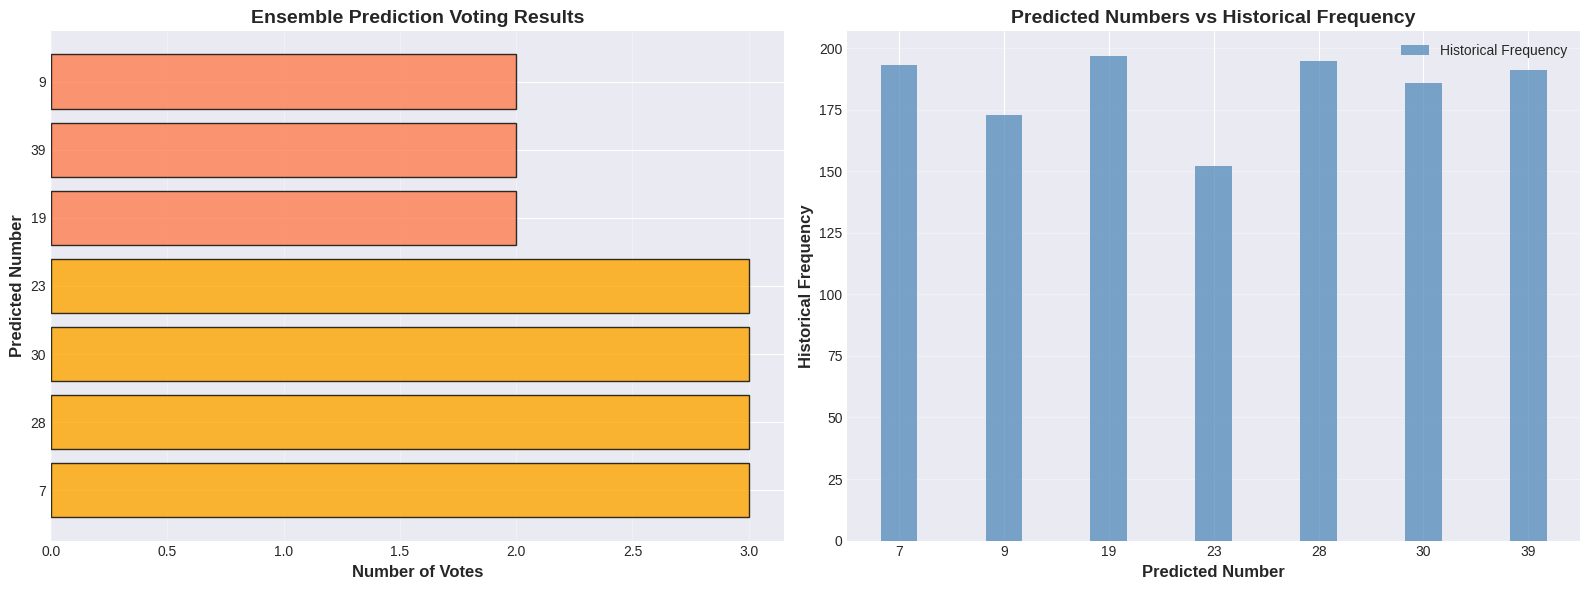

✓ Final prediction visualization complete


In [24]:
# Create final prediction visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Voting distribution
vote_df = pd.DataFrame(top_voted, columns=['Number', 'Votes'])
colors_voted = ['darkgreen' if v >= 5 else 'green' if v >= 4 else 'orange' if v >= 3 else 'coral' for v in vote_df['Votes']]
ax1.barh(vote_df['Number'].astype(str), vote_df['Votes'], color=colors_voted, alpha=0.8, edgecolor='black')
ax1.set_xlabel('Number of Votes', fontsize=12, fontweight='bold')
ax1.set_ylabel('Predicted Number', fontsize=12, fontweight='bold')
ax1.set_title('Ensemble Prediction Voting Results', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Comparison with historical frequency
freq_dict = dict(zip(freq_df['Number'], freq_df['Frequency']))
predicted_freqs = [freq_dict[num] for num in ensemble_numbers]

x = np.arange(len(ensemble_numbers))
width = 0.35

ax2.bar(x, predicted_freqs, width, label='Historical Frequency', color='steelblue', alpha=0.7)
ax2.set_xlabel('Predicted Number', fontsize=12, fontweight='bold')
ax2.set_ylabel('Historical Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Predicted Numbers vs Historical Frequency', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(ensemble_numbers)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/content/final_prediction.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Final prediction visualization complete")

## 11. Summary and Export

In [25]:
# Create summary report
summary = f"""
{'='*70}
LOTTO MAX PREDICTION SUMMARY
{'='*70}
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Dataset: {len(df)} draws from {df['Date'].min()} to {df['Date'].max()}

{'='*70}
🎯 FINAL ENSEMBLE PREDICTION
{'='*70}
Main Numbers: {ensemble_numbers}
Bonus Number: {top_bonus[0][0]}

Alternative Bonus: {[num for num, _ in top_bonus[1:6]]}

{'='*70}
INDIVIDUAL METHOD PREDICTIONS
{'='*70}
"""

for method, numbers in all_predictions.items():
    summary += f"{method:20s}: {numbers}\n"

summary += f"""
{'='*70}
KEY STATISTICS
{'='*70}
Most Frequent Numbers (All-Time):
"""

for i, row in freq_df.head(10).iterrows():
    summary += f"   {int(row['Number']):2d}: {int(row['Frequency'])} times ({row['Percentage']:.1f}%)\n"

summary += f"""
\nHot Numbers (Last 50 Draws):
"""

for num, count in list(hot_numbers.items())[:5]:
    summary += f"   {num:2d}: {count} times\n"

summary += f"""
{'='*70}
DISCLAIMER
{'='*70}
These predictions are for entertainment and educational purposes only.
Lottery draws are random and past results do not predict future outcomes.
Please play responsibly.
{'='*70}
"""

print(summary)

# Save to file
with open('/content/prediction_summary.txt', 'w') as f:
    f.write(summary)

print("\n✓ Summary saved to prediction_summary.txt")


LOTTO MAX PREDICTION SUMMARY
Generated: 2026-02-01 22:33:27
Dataset: 1205 draws from 2009-09-25 00:00:00 to 2026-01-30 00:00:00

🎯 FINAL ENSEMBLE PREDICTION
Main Numbers: [7, 9, 19, 23, 28, 30, 39]
Bonus Number: 18

Alternative Bonus: [38, 46, 27, 1, 10]

INDIVIDUAL METHOD PREDICTIONS
Frequency-Based     : [2, 7, 19, 28, 30, 36, 39]
Hot Numbers         : [3, 9, 16, 21, 30, 43, 45]
Cold Numbers        : [13, 23, 27, 33, 42, 49, 50]
Balanced            : [7, 9, 16, 22, 28, 30, 38]
Pattern-Based       : [7, 18, 19, 28, 31, 39, 41]
Machine Learning    : [4, 11, 23, 29, 35, 44, 47]
XGBoost             : [8, 13, 23, 26, 37, 44, 45]

KEY STATISTICS
Most Frequent Numbers (All-Time):
   19: 197 times (16.3%)
   28: 195 times (16.2%)
    7: 193 times (16.0%)
   39: 191 times (15.9%)
    2: 188 times (15.6%)
   30: 186 times (15.4%)
   36: 185 times (15.4%)
   22: 184 times (15.3%)
   24: 183 times (15.2%)
   38: 182 times (15.1%)


Hot Numbers (Last 50 Draws):
    9: 13 times
   43: 13 times
  

## 🎲 Ready to Play!

Your predictions have been generated using 7 different statistical and machine learning methods. The ensemble prediction combines the wisdom of all methods through voting.

**Remember:** Lottery drawings are truly random events. These predictions are based on patterns in historical data but have no real predictive power. Play responsibly and for entertainment only!

Good luck! 🍀